toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -o toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def load_emotional_speech_dataset():
    paths = []
    labels = []

    dataset_dir = 'tess toronto emotional speech set data/TESS Toronto emotional speech set data/'

    for root, _, filenames in os.walk(dataset_dir):
        for filename in filenames:
            paths.append(os.path.join(root, filename))
            label = filename.split('_')[-1].split('.')[0]
            labels.append(label.lower())

    print('Speech Emotion Dataset was Loaded')

    return paths, labels

# Call the function to load the dataset
dataset_paths, dataset_labels = load_emotional_speech_dataset()


Speech Emotion Dataset was Loaded


In [ ]:
# Create a DataFrame
data_frame = pd.DataFrame()
data_frame['speech'] = dataset_paths
data_frame['label'] = dataset_labels
data_frame.head()


,speech,label
0,tess toronto emotional speech set data/TESS To...,fear
1,tess toronto emotional speech set data/TESS To...,fear
2,tess toronto emotional speech set data/TESS To...,fear
3,tess toronto emotional speech set data/TESS To...,fear
4,tess toronto emotional speech set data/TESS To...,fear


## **EDA**

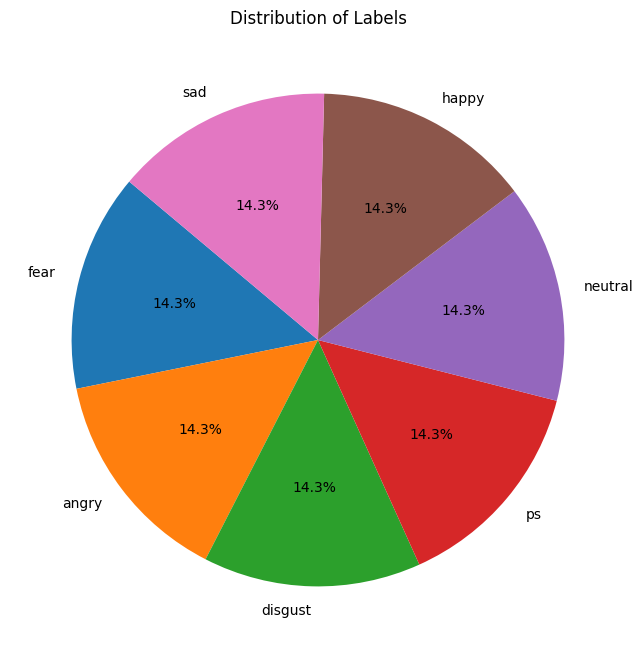

In [ ]:
# Count the occurrences of each label
label_counts = data_frame['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.show()


# **Defining the Function to create Waveplots**

In [ ]:
def funcWaveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


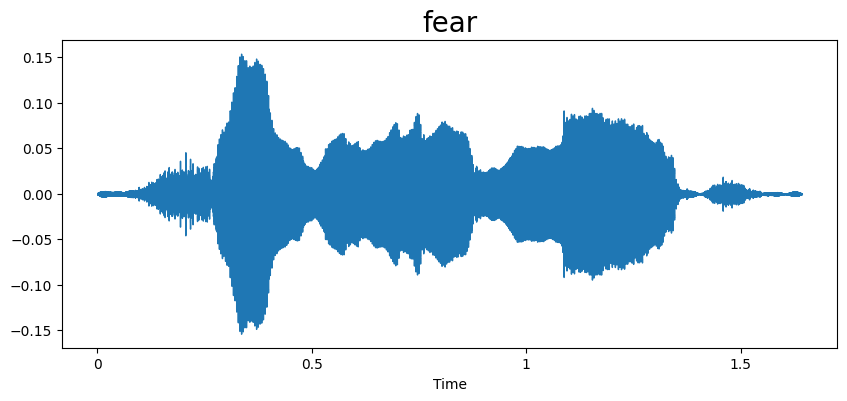

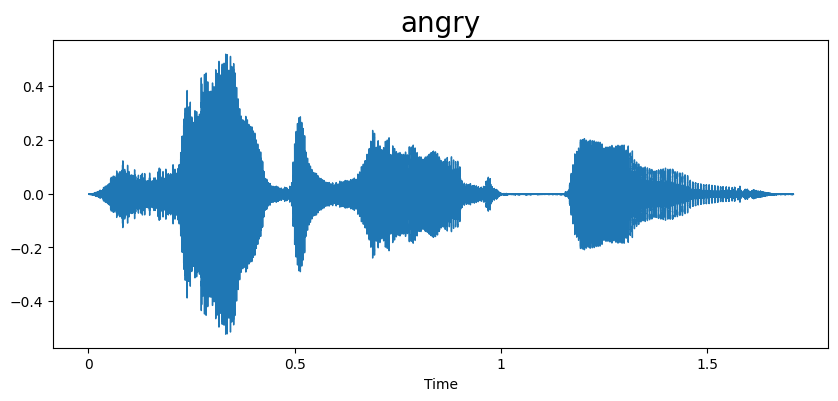

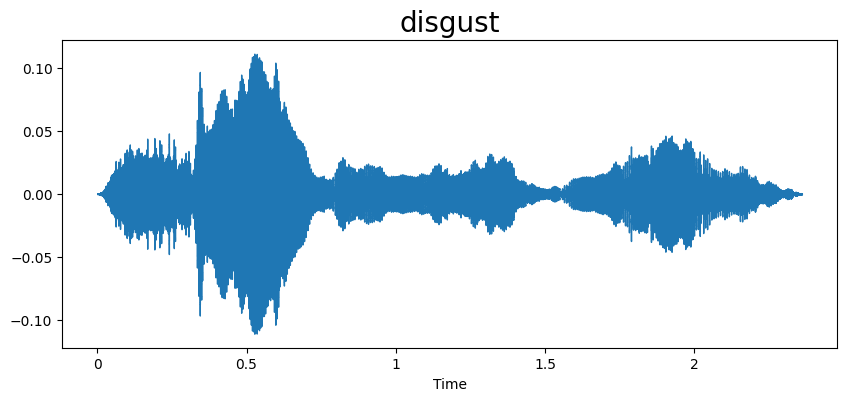

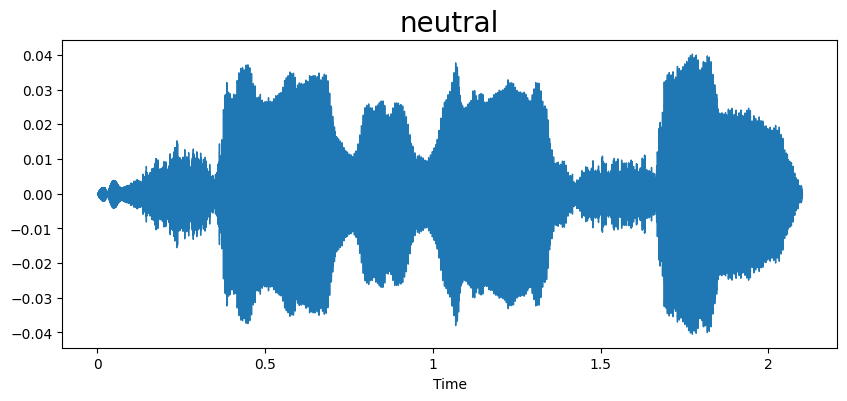

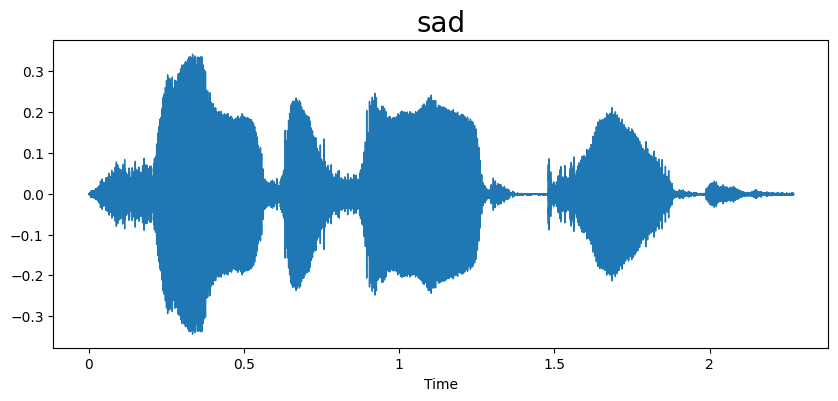

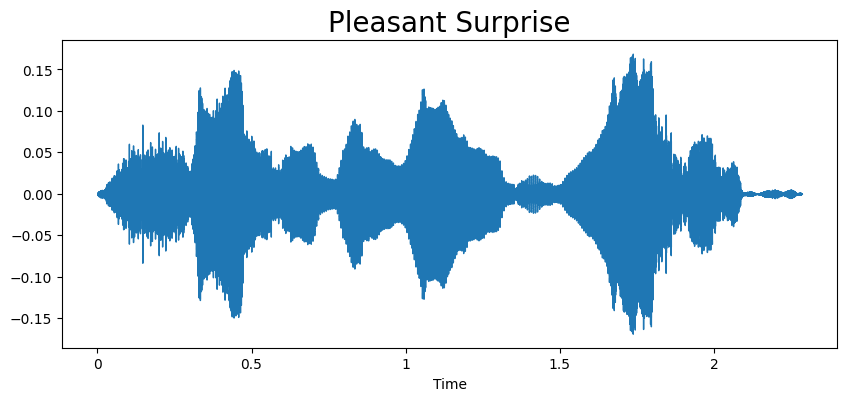

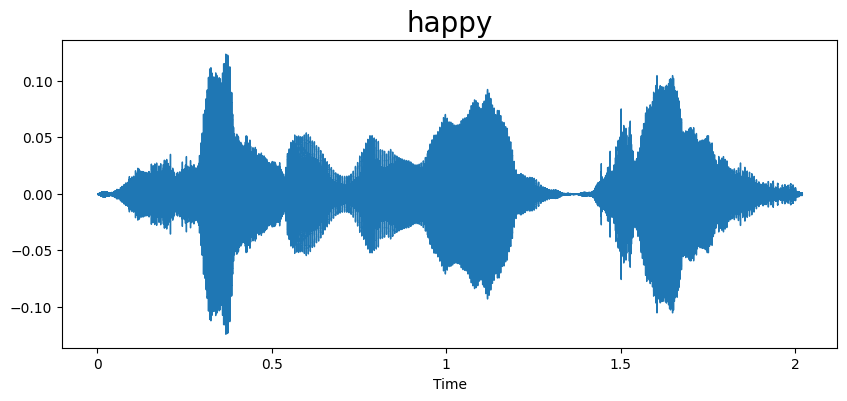

In [ ]:
emotions_to_plot = ['fear', 'angry', 'disgust', 'neutral', 'sad', 'ps', 'happy']

for emotion in emotions_to_plot:
    if emotion in data_frame['label'].values:
        path = data_frame['speech'][data_frame['label'] == emotion].iloc[0]
        data, sampling_rate = librosa.load(path)
        if emotion == 'ps':
            emotion = 'Pleasant Surprise'
        funcWaveplot(data, sampling_rate, emotion)
        Audio(path)
    else:
        print(f"No data found for emotion: {emotion}")


In [ ]:
def extract_Mel_freq_cc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [ ]:
x_Mel_freq_cc = data_frame['speech'].apply(lambda x: extract_Mel_freq_cc(x))

In [ ]:
x = [x for x in x_Mel_freq_cc]
x = np.array(x)
x.shape

(2800, 40)

In [ ]:
x = np.expand_dims(x, -1)
x.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(data_frame[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

## **Creating Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape=(40,1)),
    Dense(64, activation = 'relu'),
    Dropout(0.22),
    Dense(32, activation = 'relu'),
    Dropout(0.12),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 123)               61500     
                                                                 
 dense_9 (Dense)             (None, 64)                7936      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 7174

Epoch 1/100
9/9 [==============================] - 5s 247ms/step - loss: 1.8663 - accuracy: 0.2888 - val_loss: 2.0234 - val_accuracy: 0.0036
Epoch 2/100
9/9 [==============================] - 1s 165ms/step - loss: 1.6010 - accuracy: 0.4723 - val_loss: 2.1225 - val_accuracy: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 2s 214ms/step - loss: 1.2781 - accuracy: 0.5946 - val_loss: 2.3215 - val_accuracy: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 2s 276ms/step - loss: 0.8981 - accuracy: 0.7170 - val_loss: 2.3331 - val_accuracy: 0.0268
Epoch 5/100
9/9 [==============================] - 2s 181ms/step - loss: 0.5889 - accuracy: 0.8004 - val_loss: 1.7553 - val_accuracy: 0.1804
Epoch 6/100
9/9 [==============================] - 2s 184ms/step - loss: 0.4257 - accuracy: 0.8652 - val_loss: 1.9394 - val_accuracy: 0.2393
Epoch 7/100
9/9 [==============================] - 1s 161ms/step - loss: 0.3366 - accuracy: 0.8920 - val_loss: 1.6530 - val_accuracy: 0.4000
Epoch

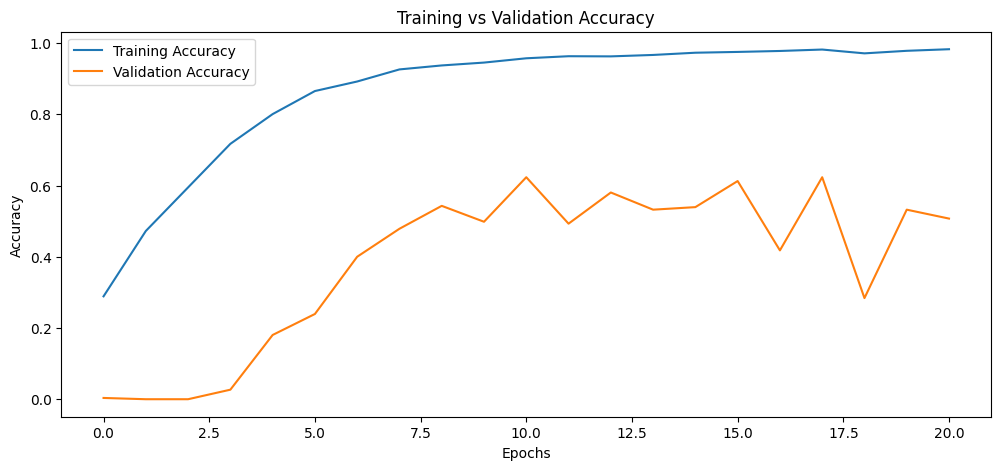

In [ ]:

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Train the model
history = model.fit(x,y, validation_split=0.2, epochs=100, batch_size=256, shuffle=True, callbacks=[early_stopping])




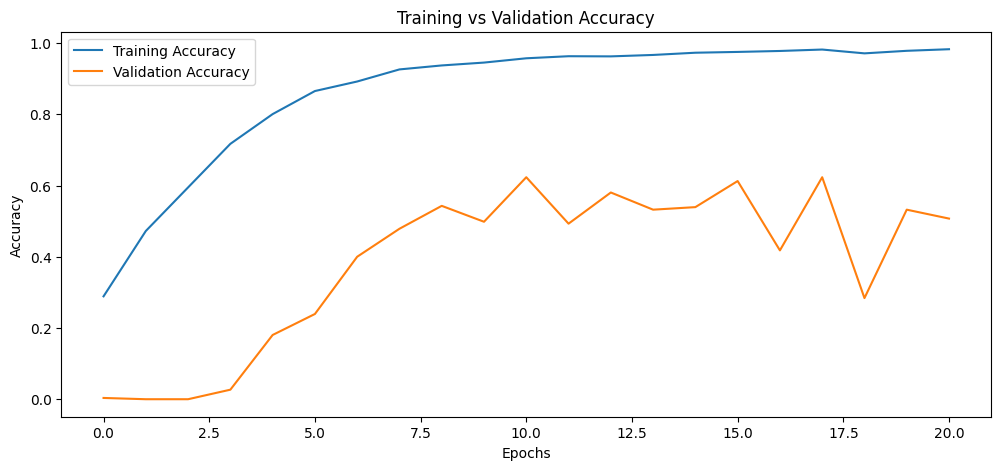

In [ ]:
# Visualize training and validation accuracy
epochs = range(len(history.history['accuracy']))

plt.figure(figsize=(12, 5))
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [ ]:
final_accuracy = history.history['accuracy'][-1]
print(f'Final Training Accuracy: {final_accuracy:.2%}')

Final Training Accuracy: 98.26%
